In [1]:
import math
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
def h(w,x): #the logistic function
    p = -np.dot(w,x)
    p = max(min(p, 20), -20)
    return 1/(1+math.exp(p))

def log_loss(x,y,w): # the total logloss
    loss = 0.
    for i in range(0, len(x)):
        xx = np.insert(x[i],0,1.0)
        yy = y[i]
        hh = h(w,xx)
        loss += - yy*math.log(hh) - (1-yy)*math.log(1-hh)
    return loss

C:\Users\40515\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def logistic_regression(x, y, nrepeat): #Input is an nxk matrix of features, and a n-D vector of labels
    class model:  # this is the output which is a class containing a method predict
        def __init__(self, w):
            self.w = w
        def predict(self, x):
            xx = np.insert(x,0,1.0)
            return h(self.w, xx)
        def w(self):
            return self.w
    # we first scale the variables by the max of the absolute value
    scale = [max(max(abs(x)), 0.0001) for x in np.transpose(x)]
    x = x/scale
    scale.insert(0,1.0)
    k = len(x[0]); t = 0.1; n = len(x); iter = 0
    w = np.random.uniform(-1,1,k+1) 
    for j in range(1, nrepeat):
        for i in range(0, len(x)):
            iter += 1
            xx = np.insert(x[i],0,1.0) # we prepend a 1 to the k-dimensional features
            yy = y[i]
            tt = t*(n*nrepeat+1-iter)/(n*nrepeat+1) # we reduce the steps gradually to 0
            #tt = t
            w = w + tt*(yy - h(w,xx))*xx # the stochastic gradient descent
            #print(" passes = ", j," samples seen = ", iter, " w= ",w/scale," loss = ", log_loss(x,y,w))
        if j%(100) == 1:
            print(" passes = ", j," samples seen = ", iter, " w= ",w/scale," loss = ", log_loss(x,y,w))
    print("total passes = ",j," total samples seen = ", iter," w= ",w/scale," loss = ", log_loss(x,y,w))

    return model(w/scale)

In [3]:
# now we use the simple example of plant watering
xplants2=np.array([[12.9,1.1], [1.2,0.2], [12.6,1.15], [5.2,0.22], [6.1,0.13], [17.6,1.11], [2.6,0.1], [20.3,1.3], [19.3,1.4], [10.7,1.2], [8.3,-0.2], [0.1,-0.4], 
[6.1,0.12], [11.9,1.1], [15.2,1.5], [14.3,1.42], [0.8,0.34], [7.5,0.33], [19.7,1.32], [1.1,0.12], [5.8,0.21], [7.1,0.23], [9.9,0.11], [3.2,0.1], 
[8.1,0.42], [3.9,0.11], [9.3,0.11], [10.70,1.12], [9.7,.0], [18.7,1.24], [13.3,1.44], [16.8,1.23], [11.2,1.5], [14.6,1.42], [2.4,0.43], [3.6,0.4], 
[15.7,1.1], [17.5,1.2], [10.4,2], [16.4,1.1], [14.1,1.23], [4.5,0.2]])
yplants2=np.array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 
0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 
1, 1, 0, 1, 1, 0])
# since we do not have much data we repeat over the data 500 times
model_plants2 = logistic_regression(xplants2, yplants2, 500)

 passes =  1  samples seen =  42  w=  [ 0.09436146  0.00842483  0.47247226]  loss =  25.4694096452
 passes =  101  samples seen =  4242  w=  [-4.78284927  0.3422386   1.8956318 ]  loss =  7.98298820203
 passes =  201  samples seen =  8442  w=  [-5.62123653  0.45363111  1.4993892 ]  loss =  7.05740700088
 passes =  301  samples seen =  12642  w=  [-6.09593167  0.51861593  1.25864949]  loss =  6.61747021007
 passes =  401  samples seen =  16842  w=  [-6.35736192  0.55359772  1.14272933]  loss =  6.40752683734
total passes =  499  total samples seen =  20958  w=  [-6.43795337  0.56463237  1.11136075]  loss =  6.34548457188


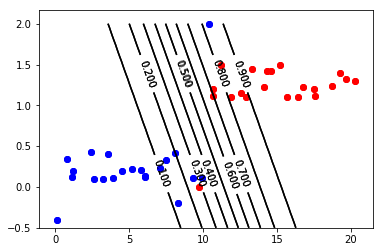

In [5]:
positives=xplants2[yplants2 > 0]; negatives=xplants2[yplants2 <= 0]
plt.scatter(positives[:,0], positives[:,1], color="red")
plt.scatter(negatives[:,0], negatives[:,1], color="blue")
#=== showing contour ===
[w0,w1,w2] = model_plants2.w
xlist = np.linspace(0, 20, 50); ylist = np.linspace(-0.5, 2, 50)
X, Y = np.meshgrid(xlist, ylist)
Z = 1/(1+np.exp(-w0 - w1*X - w2*Y))
ctp = plt.contour(X, Y, Z, np.arange(0,1,0.1), colors='k')
plt.clabel(ctp, inline=1)
plt.show()

In [7]:
# now we use the simple example of plant watering
xplants2=np.array([[12.9,1.1], [1.2,0.2], [12.6,1.15], [5.2,0.22], [6.1,0.13], [17.6,1.11], [2.6,0.1], [20.3,1.3], [19.3,1.4], [10.7,1.2], [8.3,-0.2], [0.1,-0.4], 
[6.1,0.12], [11.9,1.1], [15.2,1.5], [14.3,1.42], [0.8,0.34], [7.5,0.33], [19.7,1.32], [1.1,0.12], [5.8,0.21], [7.1,0.23], [9.9,0.11], [3.2,0.1], 
[8.1,0.42], [3.9,0.11], [9.3,0.11], [10.70,1.12], [9.7,.0], [18.7,1.24], [13.3,1.44], [16.8,1.23], [11.2,1.5], [14.6,1.42], [2.4,0.43], [3.6,0.4], 
[15.7,1.1], [17.5,1.2], [10.4,2], [16.4,1.1], [14.1,1.23], [4.5,0.2]])
yplants2=np.array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 
0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 
1, 1, 0, 1, 1, 0])
# since we do not have much data we repeat over the data 1000 times
model_plants2 = logistic_regression(xplants2, yplants2, 1000)

 passes =  1  samples seen =  42  w=  [-0.5997301   0.02236391  0.52936396]  loss =  22.4971688452
 passes =  101  samples seen =  4242  w=  [-4.89483674  0.3570028   1.83687572]  loss =  7.84477040066
 passes =  201  samples seen =  8442  w=  [-5.85300094  0.48531824  1.36657199]  loss =  6.83288960944
 passes =  301  samples seen =  12642  w=  [-6.5218253   0.57444423  1.0544152 ]  loss =  6.28795468772
 passes =  401  samples seen =  16842  w=  [-7.04116526  0.64016779  0.86278842]  loss =  5.95208711848
 passes =  501  samples seen =  21042  w=  [-7.44571964  0.68956933  0.73946386]  loss =  5.72950978643
 passes =  601  samples seen =  25242  w=  [-7.75569311  0.72659457  0.65733677]  loss =  5.57708893383
 passes =  701  samples seen =  29442  w=  [-7.98483165  0.75359803  0.60273356]  loss =  5.47290627361
 passes =  801  samples seen =  33642  w=  [-8.14232869  0.7720267   0.5683465 ]  loss =  5.40496995939
 passes =  901  samples seen =  37842  w=  [-8.23392349  0.7827583   0.

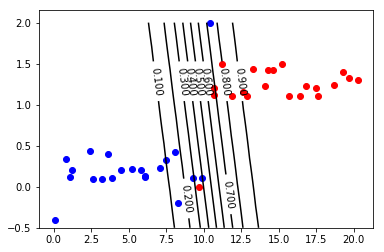

In [8]:
positives=xplants2[yplants2 > 0]; negatives=xplants2[yplants2 <= 0]
plt.scatter(positives[:,0], positives[:,1], color="red")
plt.scatter(negatives[:,0], negatives[:,1], color="blue")
#=== showing contour ===
[w0,w1,w2] = model_plants2.w
xlist = np.linspace(0, 20, 50); ylist = np.linspace(-0.5, 2, 50)
X, Y = np.meshgrid(xlist, ylist)
Z = 1/(1+np.exp(-w0 - w1*X - w2*Y))
ctp = plt.contour(X, Y, Z, np.arange(0,1,0.1), colors='k')
plt.clabel(ctp, inline=1)
plt.show()

In [12]:
# now we use the simple example of plant watering
xplants2=np.array([[12.9,1.1], [1.2,0.2], [12.6,1.15], [5.2,0.22], [6.1,0.13], [17.6,1.11], [2.6,0.1], [20.3,1.3], [19.3,1.4], [10.7,1.2], [8.3,-0.2], [0.1,-0.4], 
[6.1,0.12], [11.9,1.1], [15.2,1.5], [14.3,1.42], [0.8,0.34], [7.5,0.33], [19.7,1.32], [1.1,0.12], [5.8,0.21], [7.1,0.23], [9.9,0.11], [3.2,0.1], 
[8.1,0.42], [3.9,0.11], [9.3,0.11], [10.70,1.12], [9.7,.0], [18.7,1.24], [13.3,1.44], [16.8,1.23], [11.2,1.5], [14.6,1.42], [2.4,0.43], [3.6,0.4], 
[15.7,1.1], [17.5,1.2], [10.4,2], [16.4,1.1], [14.1,1.23], [4.5,0.2]])
yplants2=np.array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 
0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 
1, 1, 0, 1, 1, 0])
# since we do not have much data we repeat over the data 2000 times
model_plants2 = logistic_regression(xplants2,yplants2,2000)

 passes =  1  samples seen =  42  w=  [-0.25300151  0.01766145  0.00360411]  loss =  27.3423900811
 passes =  101  samples seen =  4242  w=  [-4.98176271  0.37220423  1.74269731]  loss =  7.70568893444
 passes =  201  samples seen =  8442  w=  [-6.00778059  0.50679751  1.27617001]  loss =  6.69009459554
 passes =  301  samples seen =  12642  w=  [-6.76403431  0.60541277  0.95103127]  loss =  6.1232583264
 passes =  401  samples seen =  16842  w=  [-7.39150095  0.68295268  0.74260827]  loss =  5.75787794033
 passes =  501  samples seen =  21042  w=  [-7.92229551  0.74619876  0.5992579 ]  loss =  5.50082250942
 passes =  601  samples seen =  25242  w=  [-8.37614044  0.79904442  0.49394534]  loss =  5.30938073291
 passes =  701  samples seen =  29442  w=  [-8.76744705  0.84391037  0.41295806]  loss =  5.16121417741
 passes =  801  samples seen =  33642  w=  [-9.10678849  0.88239238  0.3487601 ]  loss =  5.04344166153
 passes =  901  samples seen =  37842  w=  [-9.40198021  0.9155933   0.2

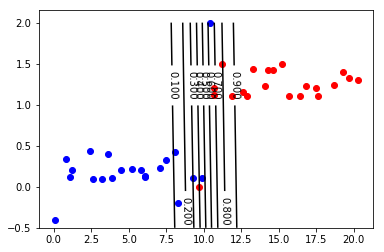

In [10]:
positives=xplants2[yplants2 > 0]; negatives=xplants2[yplants2 <= 0]
plt.scatter(positives[:,0], positives[:,1], color="red")
plt.scatter(negatives[:,0], negatives[:,1], color="blue")
#=== showing contour ===
[w0,w1,w2] = model_plants2.w
xlist = np.linspace(0, 20, 50); ylist = np.linspace(-0.5, 2, 50)
X, Y = np.meshgrid(xlist, ylist)
Z = 1/(1+np.exp(-w0 - w1*X - w2*Y))
ctp = plt.contour(X, Y, Z, np.arange(0,1,0.1), colors='k')
plt.clabel(ctp, inline=1)
plt.show()

In [11]:
print("when we repeat more time the loss will be small and the line are more straight")

when we repeat more time the loss will be small and the line are more straight
